# **CPSC 392 Final Project**
### **Members:** Christopher Isidro, Karen Ngo, Michelle Zhang


In [ ]:
# Importing necessary starter packages
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

%matplotlib inline

In [ ]:
# Initialize df
df = pd.read_csv("https://raw.githubusercontent.com/michelleezhangg/final-project/main/college-admissions.csv")

print(df.columns)
df.head()

Index(['Name', 'Applicants total', 'Admissions total', 'Enrolled total',
       'Percent of freshmen submitting SAT scores',
       'Percent of freshmen submitting ACT scores',
       'SAT Critical Reading 25th percentile score',
       'SAT Critical Reading 75th percentile score',
       'SAT Math 25th percentile score', 'SAT Math 75th percentile score',
       ...
       'Percent of freshmen  receiving federal grant aid',
       'Percent of freshmen receiving Pell grants',
       'Percent of freshmen receiving other federal grant aid',
       'Percent of freshmen receiving state/local grant aid',
       'Percent of freshmen receiving institutional grant aid',
       'Percent of freshmen receiving student loan aid',
       'Percent of freshmen receiving federal student loans',
       'Percent of freshmen receiving other loan aid',
       'Endowment assets (year end) per FTE enrollment (GASB)',
       'Endowment assets (year end) per FTE enrollment (FASB)'],
      dtype='object', lengt

,Name,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,Alabama A & M University,6142.0,5521.0,1104.0,15.0,88.0,370.0,450.0,350.0,450.0,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,University of Alabama at Birmingham,5689.0,4934.0,1773.0,6.0,93.0,520.0,640.0,520.0,650.0,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,Amridge University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,University of Alabama in Huntsville,2054.0,1656.0,651.0,34.0,94.0,510.0,640.0,510.0,650.0,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,Alabama State University,10245.0,5251.0,1479.0,18.0,87.0,380.0,480.0,370.0,480.0,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


# **Supervised Models**

In this section, we explore 2 Supervised model questions.

In [ ]:
# import necessary packages for supervised learning model creation

import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, roc_auc_score, recall_score, precision_score, f1_score

%matplotlib inline

np.random.seed(392)

## **Question 1**
What are the differences in the correlation between SAT and ACT scores with admission total across different types of universities (e.g., public vs. private, selective vs. non-selective), and what factors may contribute to these differences?

In [ ]:
# load data and observations of
df_supervised = pd.read_csv("https://raw.githubusercontent.com/michelleezhangg/final-project/main/college-admissions.csv")
df_supervised

,Name,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,Alabama A & M University,6142.0,5521.0,1104.0,15.0,88.0,370.0,450.0,350.0,450.0,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,University of Alabama at Birmingham,5689.0,4934.0,1773.0,6.0,93.0,520.0,640.0,520.0,650.0,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,Amridge University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,University of Alabama in Huntsville,2054.0,1656.0,651.0,34.0,94.0,510.0,640.0,510.0,650.0,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,Alabama State University,10245.0,5251.0,1479.0,18.0,87.0,380.0,480.0,370.0,480.0,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,University of South Florida-Sarasota-Manatee,393.0,136.0,86.0,79.0,59.0,502.0,580.0,490.0,570.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4422.0,NaN
1530,The Kingâ€™s College,3033.0,2158.0,127.0,57.0,45.0,540.0,630.0,510.0,600.0,...,34.0,34.0,10.0,4.0,100.0,57.0,56.0,12.0,NaN,935.0
1531,Ottawa University-Online,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20863.0
1532,Providence Christian College,122.0,65.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,...,50.0,50.0,14.0,0.0,100.0,64.0,64.0,14.0,NaN,350.0


In [ ]:
# modify dataset to contain necessary variables
keep = ["Admissions total", "SAT Critical Reading 25th percentile score", "SAT Critical Reading 75th percentile score", "SAT Math 25th percentile score", "SAT Math 75th percentile score", "SAT Writing 25th percentile score", "SAT Writing 75th percentile score", "ACT Composite 25th percentile score", "ACT Composite 75th percentile score", 'Sector of institution']
df_supervised = df_supervised[keep]
df_supervised.dropna(inplace=True)

df_supervised

,Admissions total,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,Sector of institution
5,17515.0,490.0,620.0,500.0,640.0,480.0,600.0,22.0,30.0,"Public, 4-year or above"
8,13027.0,520.0,620.0,540.0,650.0,510.0,620.0,24.0,30.0,"Public, 4-year or above"
14,198.0,550.0,640.0,500.0,600.0,530.0,610.0,19.0,24.0,"Private not-for-profit, 4-year or above"
18,1209.0,495.0,613.0,465.0,550.0,440.0,580.0,20.0,26.0,"Public, 4-year or above"
21,2653.0,500.0,630.0,510.0,610.0,500.0,610.0,23.0,28.0,"Private not-for-profit, 4-year or above"
...,...,...,...,...,...,...,...,...,...,...
1503,7108.0,470.0,550.0,470.0,550.0,460.0,540.0,20.0,24.0,"Public, 4-year or above"
1516,960.0,460.0,620.0,470.0,590.0,460.0,600.0,20.0,26.0,"Private not-for-profit, 4-year or above"
1525,1406.0,490.0,590.0,490.0,570.0,470.0,560.0,21.0,25.0,"Public, 4-year or above"
1529,136.0,502.0,580.0,490.0,570.0,490.0,570.0,22.0,25.0,"Public, 4-year or above"


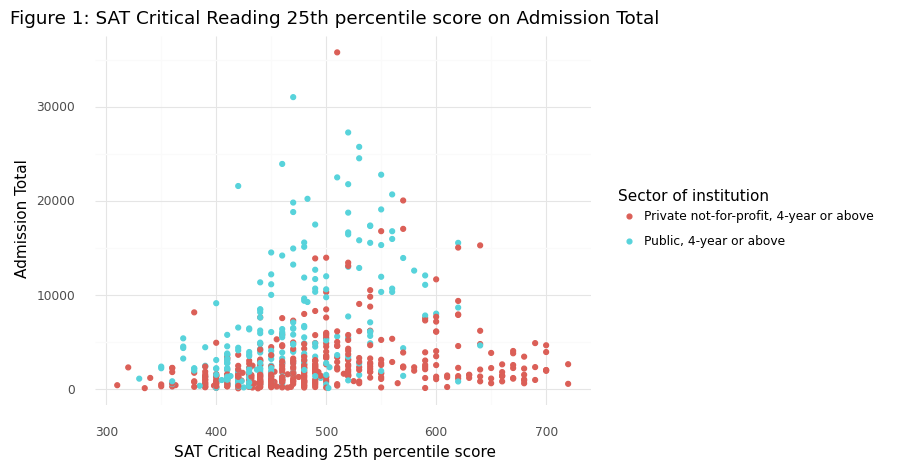

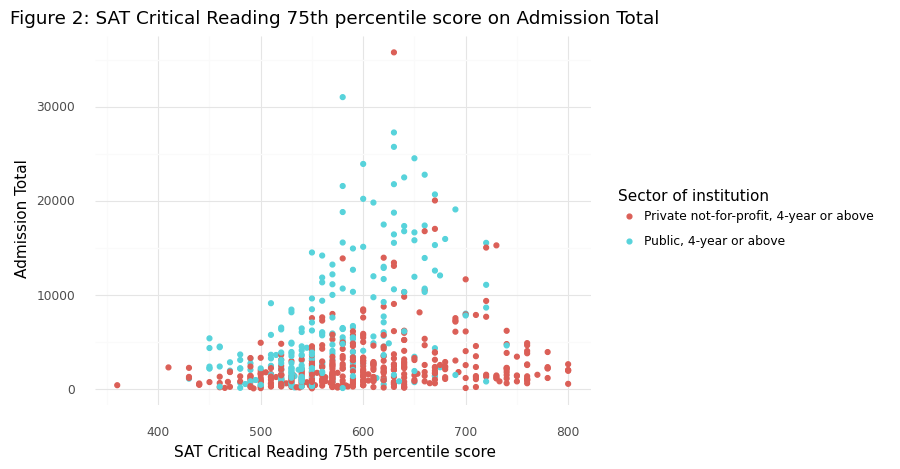

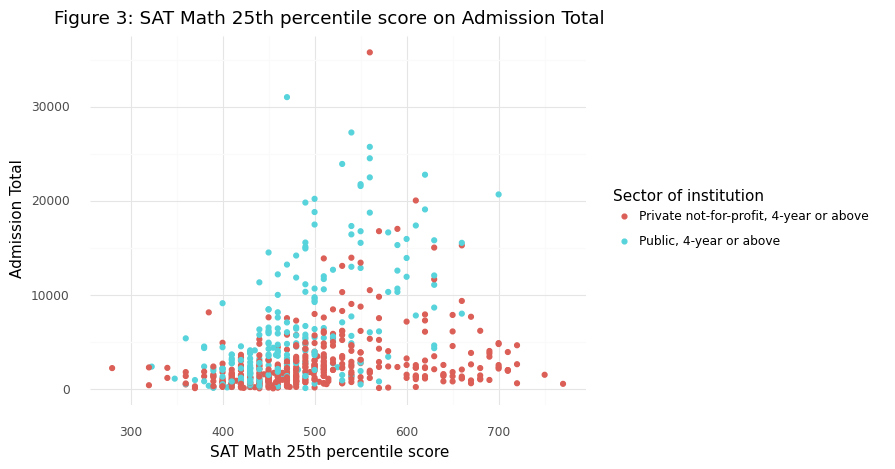

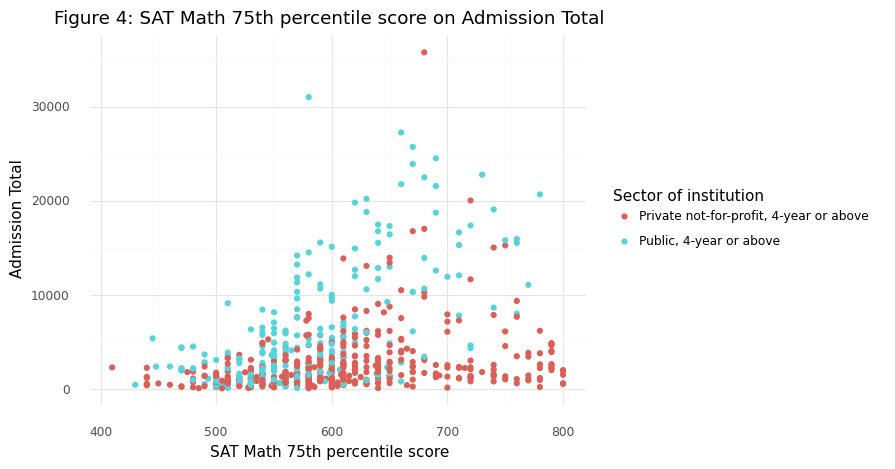

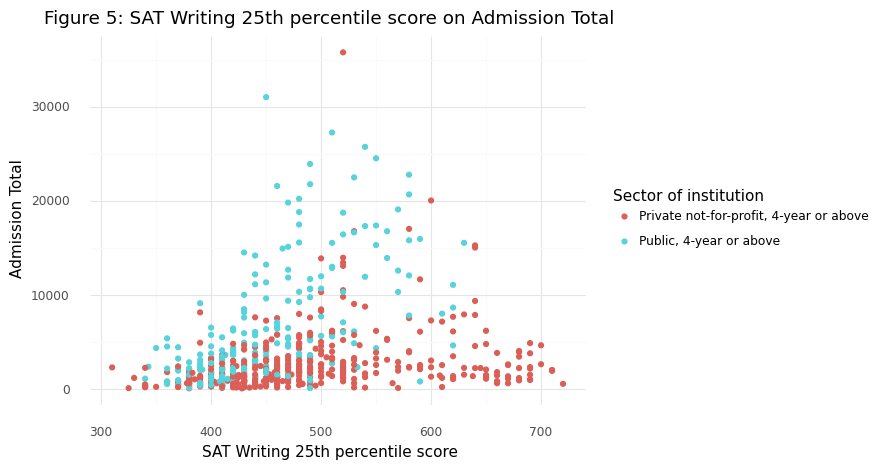

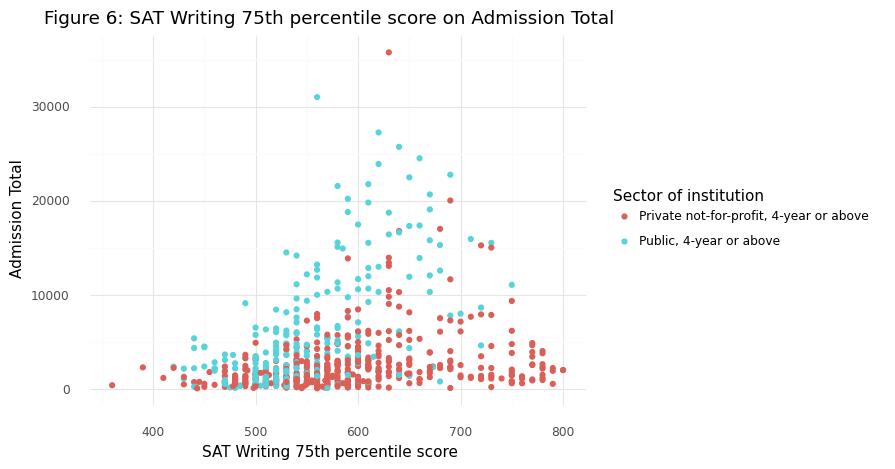

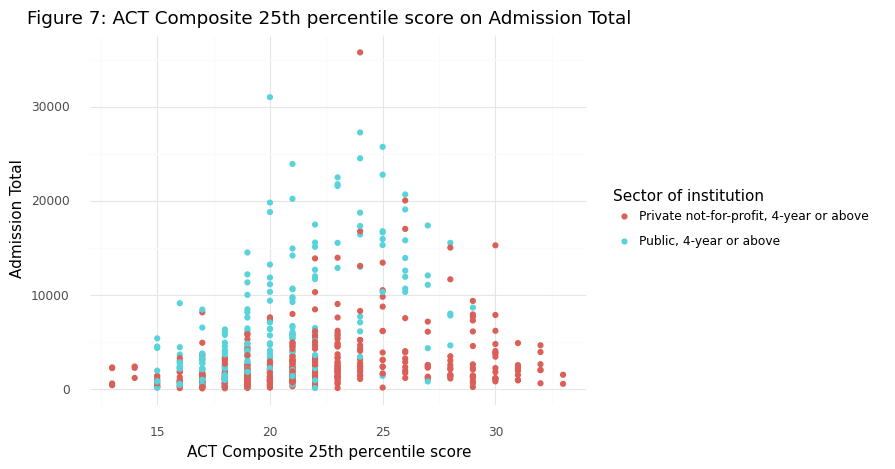

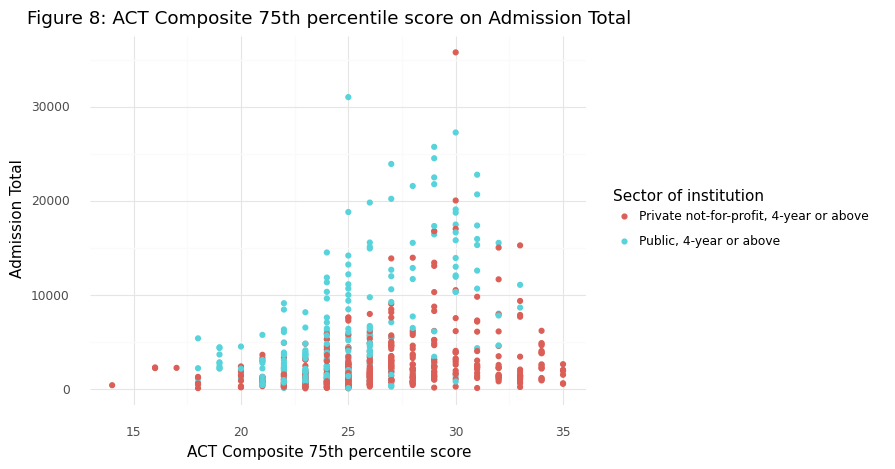

In [ ]:
# relationship graphs
graph_list = ["SAT Critical Reading 25th percentile score", "SAT Critical Reading 75th percentile score", "SAT Math 25th percentile score", "SAT Math 75th percentile score", "SAT Writing 25th percentile score", "SAT Writing 75th percentile score", "ACT Composite 25th percentile score", "ACT Composite 75th percentile score"]
figure = 1

# create a for loop to graph the admissions total against all of the SAT and ACT score
for i in graph_list:


  plots = (ggplot(df_supervised, aes(x=i, y="Admissions total", color='Sector of institution')) +
          geom_point() +
          theme_minimal() +
          labs(title = "Figure " + str(figure) + ": " + i +" on Admission Total", x=i, y="Admission Total"))
  figure += 1

  print(plots)

**Figure 1**: Scatterplot of SAT Critical Reading 25th percentile score on Admission Total by Sector of Institution. This scatterplot visualizes the relationship between SAT Critical Reading Scores of the 25th percentile of test takers' scores fall under and admission total for different types of universities (public or private). The x-axis represents the SAT Critical Reading Score, the y-axis represents the admission total, and the data points are color coded to distinguish between private (red) and public (blue) universities.

**Figure 2**: Scatterplot of SAT Critical Reading 75th percentile score on Admission Total by Sector of Institution. This scatterplot visualizes the relationship between SAT Critical Reading Scores of the 75th percentile of test takers' scores fall under and admission total for different types of universities (public or private). The x-axis represents the SAT Critical Reading Score, the y-axis represents the admission total, and the data points are color coded to distinguish between private (red) and public (blue) universities.

**Figure 3**: Scatterplot of SAT Math 25th percentile score on Admission Total by Sector of Institution. This scatterplot visualizes the relationship between SAT Math scores of the 25th percentile of test takers' scores fall under and admission total for different types of universities (public or private). The x-axis represents the SAT Math Score, the y-axis represents the admission total, and the data points are color coded to distinguish between private (red) and public (blue) universities.

**Figure 4**: Scatterplot of SAT Math 75th percentile score on Admission Total by Sector of Institution. This scatterplot visualizes the relationship between SAT Math scores of the 75th percentile of test takers' scores fall under and admission total for different types of universities (public or private). The x-axis represents the SAT Math Score, the y-axis represents the admission total, and the data points are color coded to distinguish between private (red) and public (blue) universities.

**Figure 5**: Scatterplot of SAT Writing 25th percentile score on Admission Total by Sector of Institution. This scatterplot visualizes the relationship between SAT Writing scores of the 25th percentile of test takers' scores fall under and admission total for different types of universities (public or private). The x-axis represents the SAT Writing Score, the y-axis represents the admission total, and the data points are color coded to distinguish between private (red) and public (blue) universities.

**Figure 6**: Scatterplot of SAT Writing 75th percentile score on Admission Total by Sector of Institution. This scatterplot visualizes the relationship between SAT Writing scores of the 75th percentile of test takers' scores fall under and admission total for different types of universities (public or private). The x-axis represents the SAT Writing Score, the y-axis represents the admission total, and the data points are color coded to distinguish between private (red) and public (blue) universities.

**Figure 7**: Scatterplot of ACT Composite Score 25th percentile score on Admission Total by Sector of Institution. This scatterplot visualizes the relationship between ACT composite score of the 25th percentile of test takers' scores fall under and admission total for different types of universities (public or private). The x-axis represents the ACT Composite score, the y-axis represents the admission total, and the data points are color coded to distinguish between private (red) and public (blue) universities.

**Figure 8**: Scatterplot of ACT Composite Score 75th percentile score on Admission Total by Sector of Institution. This scatterplot visualizes the relationship between ACT composite score of the 75th percentile of test takers' scores fall under and admission total for different types of universities (public or private). The x-axis represents the ACT Composite score, the y-axis represents the admission total, and the data points are color coded to distinguish between private (red) and public (blue) universities.

In [ ]:
# data cleaning to convert the sector of institution variable to dummy
dummy = pd.get_dummies(df_supervised['Sector of institution'], prefix="university_sector")
df_supervised = pd.concat([df_supervised, dummy], axis = 1)
df_supervised = df_supervised.drop('Sector of institution', axis=1)
df_supervised

,Admissions total,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,"university_sector_Private not-for-profit, 4-year or above","university_sector_Public, 4-year or above"
5,17515.0,490.0,620.0,500.0,640.0,480.0,600.0,22.0,30.0,0,1
8,13027.0,520.0,620.0,540.0,650.0,510.0,620.0,24.0,30.0,0,1
14,198.0,550.0,640.0,500.0,600.0,530.0,610.0,19.0,24.0,1,0
18,1209.0,495.0,613.0,465.0,550.0,440.0,580.0,20.0,26.0,0,1
21,2653.0,500.0,630.0,510.0,610.0,500.0,610.0,23.0,28.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1503,7108.0,470.0,550.0,470.0,550.0,460.0,540.0,20.0,24.0,0,1
1516,960.0,460.0,620.0,470.0,590.0,460.0,600.0,20.0,26.0,1,0
1525,1406.0,490.0,590.0,490.0,570.0,470.0,560.0,21.0,25.0,0,1
1529,136.0,502.0,580.0,490.0,570.0,490.0,570.0,22.0,25.0,0,1


In [ ]:
# Linear Regression #1: ACT/SAT scores on Admission total with Private Universities
predictors1 = ["SAT Critical Reading 25th percentile score", "SAT Critical Reading 75th percentile score", "SAT Math 25th percentile score", "SAT Math 75th percentile score", "SAT Writing 25th percentile score", "SAT Writing 75th percentile score", "ACT Composite 25th percentile score", "ACT Composite 75th percentile score", "university_sector_Private not-for-profit, 4-year or above"]
X = df_supervised[predictors1]
y = df_supervised["Admissions total"]

#tts
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# z score

cont = ["SAT Critical Reading 25th percentile score", "SAT Critical Reading 75th percentile score", "SAT Math 25th percentile score", "SAT Math 75th percentile score", "SAT Writing 25th percentile score", "SAT Writing 75th percentile score", "ACT Composite 25th percentile score", "ACT Composite 75th percentile score"]
z = StandardScaler()

X_train[cont] = z.fit_transform(X_train[cont])
X_test[cont] = z.transform(X_test[cont])

# Linear regression
lr1 = LinearRegression()
lr1.fit(X_train, y_train)


#calculate the MAE train and test score
lr1_mae_train = mean_absolute_error(y_train, lr1.predict(X_train))
lr1_mae_test = mean_absolute_error(y_test, lr1.predict(X_test))

#calculate the r2 train and test score
lr1_r2_train = r2_score(y_train, lr1.predict(X_train))
lr1_r2_test = r2_score(y_test, lr1.predict(X_test))

#print the results
print("LR 1 MAE Train: ", lr1_mae_train)
print("LR 1 MAE Test: ", lr1_mae_test)
print("LR 1 R2 Train: ", lr1_r2_train)
print("LR 1 R2 Test: ", lr1_r2_test)


LR 1 MAE Train:  2598.9892559248556
LR 1 MAE Test:  2796.8785577215904
LR 1 R2 Train:  0.33246317078309384
LR 1 R2 Test:  0.298318112411587


In [ ]:
# Linear Regression #2: ACT/SAT scores on Admission total with Public Universities
predictors2 = ["SAT Critical Reading 25th percentile score", "SAT Critical Reading 75th percentile score", "SAT Math 25th percentile score", "SAT Math 75th percentile score", "SAT Writing 25th percentile score", "SAT Writing 75th percentile score", "ACT Composite 25th percentile score", "ACT Composite 75th percentile score", "university_sector_Public, 4-year or above"]
X = df_supervised[predictors2]
y = df_supervised["Admissions total"]

#tts
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# z score

cont = ["SAT Critical Reading 25th percentile score", "SAT Critical Reading 75th percentile score", "SAT Math 25th percentile score", "SAT Math 75th percentile score", "SAT Writing 25th percentile score", "SAT Writing 75th percentile score", "ACT Composite 25th percentile score", "ACT Composite 75th percentile score"]
z = StandardScaler()

X_train[cont] = z.fit_transform(X_train[cont])
X_test[cont] = z.transform(X_test[cont])


#linear regression
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

# calculate the mae train and test score
lr2_mae_train = mean_absolute_error(y_train, lr2.predict(X_train))
lr2_mae_test = mean_absolute_error(y_test, lr2.predict(X_test))

#calculate the r2 train and test score
lr2_r2_train = r2_score(y_train, lr2.predict(X_train))
lr2_r2_test = r2_score(y_test, lr2.predict(X_test))

#print the results
print("LR 2 MAE Train: ", lr2_mae_train)
print("LR 2 MAE Test: ", lr2_mae_test)
print("LR 2 R2 Train: ", lr2_r2_train)
print("LR 2 R2 Test: ", lr2_r2_test)


LR 2 MAE Train:  2665.5262735295037
LR 2 MAE Test:  2459.4752444584924
LR 2 R2 Train:  0.3055283370858993
LR 2 R2 Test:  0.41278939771168033


In [ ]:
# Linear Regression #3: ACT/SAT scores on Admission total with Private and Public Universities
predictors3 = ["SAT Critical Reading 25th percentile score", "SAT Critical Reading 75th percentile score", "SAT Math 25th percentile score", "SAT Math 75th percentile score", "SAT Writing 25th percentile score", "SAT Writing 75th percentile score", "ACT Composite 25th percentile score", "ACT Composite 75th percentile score", "university_sector_Private not-for-profit, 4-year or above", "university_sector_Public, 4-year or above"]
X = df_supervised[predictors3]
y = df_supervised["Admissions total"]

#tts
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# z score

cont = ["SAT Critical Reading 25th percentile score", "SAT Critical Reading 75th percentile score", "SAT Math 25th percentile score", "SAT Math 75th percentile score", "SAT Writing 25th percentile score", "SAT Writing 75th percentile score", "ACT Composite 25th percentile score", "ACT Composite 75th percentile score"]
z = StandardScaler()

X_train[cont] = z.fit_transform(X_train[cont])
X_test[cont] = z.transform(X_test[cont])

#linear regression
lr3 = LinearRegression()
lr3.fit(X_train, y_train)


#calculate the mae train and test score
lr3_mae_train = mean_absolute_error(y_train, lr3.predict(X_train))
lr3_mae_test = mean_absolute_error(y_test, lr3.predict(X_test))

#calculate the r2 train and test score
lr3_r2_train = r2_score(y_train, lr3.predict(X_train))
lr3_r2_test = r2_score(y_test, lr3.predict(X_test))

# print the results
print("LR 3 MAE Train: ", lr3_mae_train)
print("LR 3 MAE Test: ", lr3_mae_test)
print("LR 3 R2 Train: ", lr3_r2_train)
print("LR 3 R2 Test: ", lr3_r2_test)


LR 3 MAE Train:  2684.954615956374
LR 3 MAE Test:  2441.71119732494
LR 3 R2 Train:  0.3196431072637329
LR 3 R2 Test:  0.3537961482857954


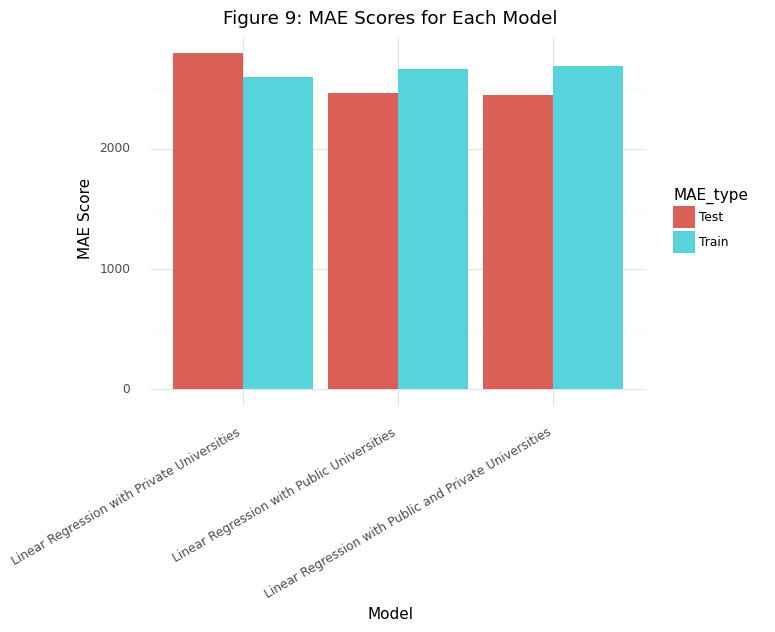

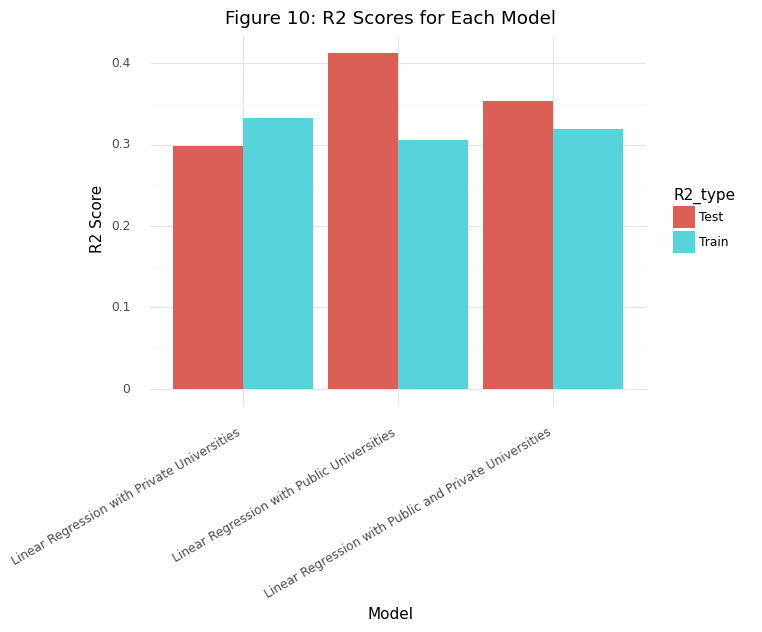


          Coef                                               Name
0 -2975.820881         SAT Critical Reading 25th percentile score
1 -2727.828339         SAT Critical Reading 75th percentile score
2  2139.266861                     SAT Math 25th percentile score
3  1775.157126                     SAT Math 75th percentile score
4  2012.831716                  SAT Writing 25th percentile score
5   854.805107                  SAT Writing 75th percentile score
6  -960.542658                ACT Composite 25th percentile score
7  1709.921348                ACT Composite 75th percentile score
8 -3887.249347  university_sector_Private not-for-profit, 4-ye...


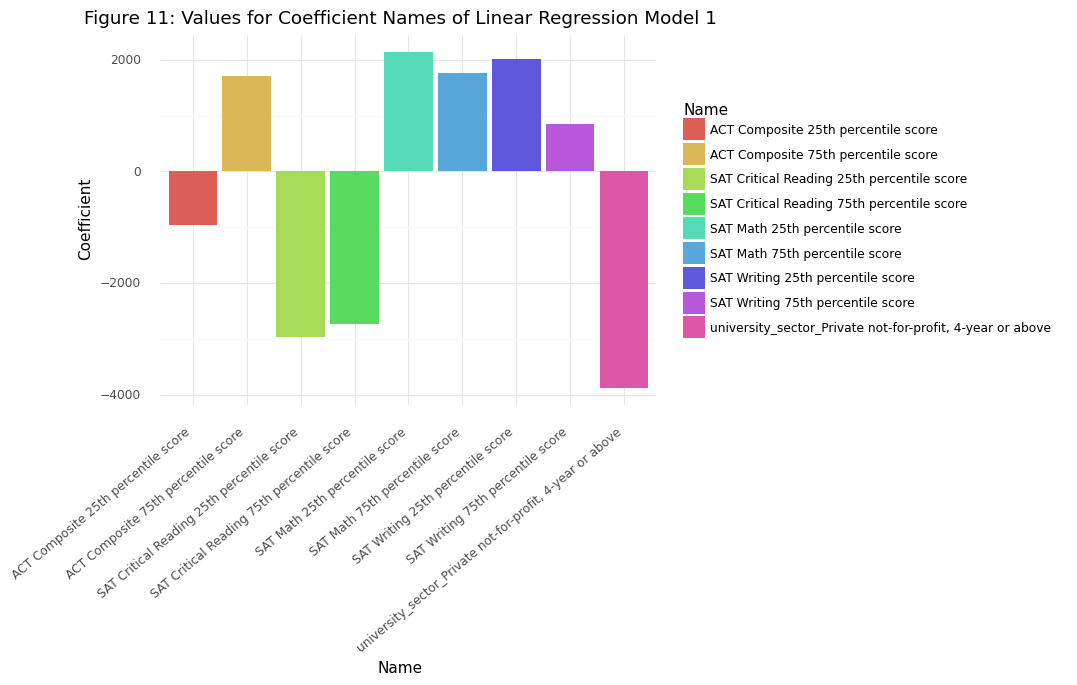


          Coef                                        Name
0 -2919.453932  SAT Critical Reading 25th percentile score
1 -2998.177673  SAT Critical Reading 75th percentile score
2  2199.574594              SAT Math 25th percentile score
3  1647.620661              SAT Math 75th percentile score
4  1366.420472           SAT Writing 25th percentile score
5  1617.950410           SAT Writing 75th percentile score
6 -1099.135477         ACT Composite 25th percentile score
7  1853.094148         ACT Composite 75th percentile score
8  3859.614954   university_sector_Public, 4-year or above


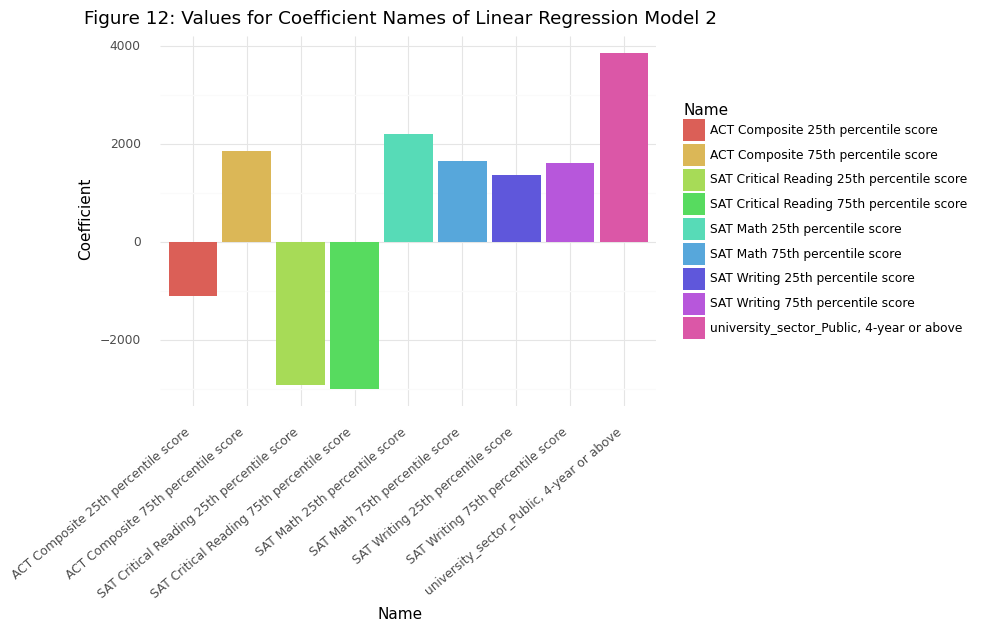


          Coef                                               Name
0 -2526.461780         SAT Critical Reading 25th percentile score
1 -2945.027663         SAT Critical Reading 75th percentile score
2  2002.057470                     SAT Math 25th percentile score
3  2113.488239                     SAT Math 75th percentile score
4  1959.242162                  SAT Writing 25th percentile score
5  1004.941181                  SAT Writing 75th percentile score
6 -1758.778331                ACT Composite 25th percentile score
7  1919.385228                ACT Composite 75th percentile score
8 -2064.318703  university_sector_Private not-for-profit, 4-ye...
9  2064.318703          university_sector_Public, 4-year or above


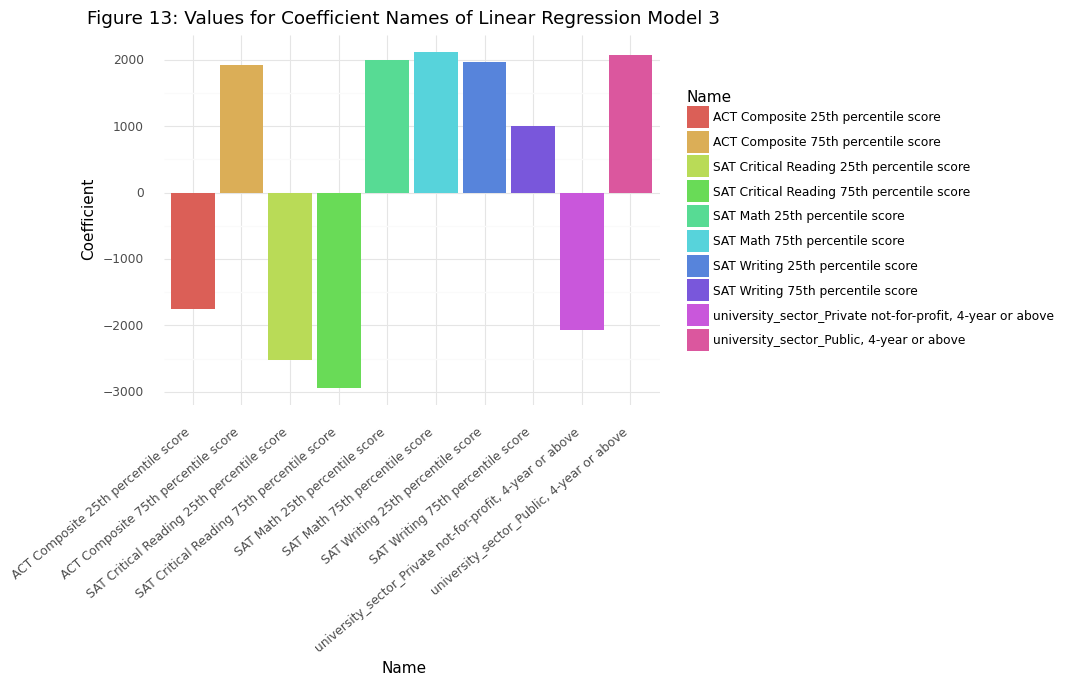

In [ ]:

# GRAPHS

# create a dataframe with all mae train and test results
train_mae = pd.DataFrame({
    "Model": [
        'Linear Regression with Private Universities',
        'Linear Regression with Public Universities',
        'Linear Regression with Public and Private Universities'
    ],
    "MAE_type": "Train",
    "MAE": [lr1_mae_train, lr2_mae_train, lr3_mae_train]
})

test_mae = pd.DataFrame({
    "Model": [
        'Linear Regression with Private Universities',
        'Linear Regression with Public Universities',
        'Linear Regression with Public and Private Universities'
    ],
    "MAE_type": "Test",
    "MAE": [lr1_mae_test, lr2_mae_test, lr3_mae_test]
})

# join the dataframes
mae = pd.concat([train_mae, test_mae], ignore_index=True)

# bar chart with all the mae scores
mae_chart = (ggplot(mae, aes(x="Model", y="MAE", fill="MAE_type")) +
             geom_bar(stat="identity", position="dodge") +
             theme_minimal() +
             labs(title="Figure 9: MAE Scores for Each Model", x="Model", y="MAE Score") +
             theme(axis_text_x=element_text(angle=30, hjust=1)))

# create a data frmae with the r2 train and test results
train_r2= pd.DataFrame({
    "Model": [
        'Linear Regression with Private Universities',
        'Linear Regression with Public Universities',
        'Linear Regression with Public and Private Universities'
    ],
    "R2_type": "Train",
    "R2": [lr1_r2_train, lr2_r2_train, lr3_r2_train]
})

test_r2 = pd.DataFrame({
    "Model": [
        'Linear Regression with Private Universities',
        'Linear Regression with Public Universities',
        'Linear Regression with Public and Private Universities'
    ],
    "R2_type": "Test",
    "R2": [lr1_r2_test, lr2_r2_test, lr3_r2_test]
})

# join the dataframes
r2 = pd.concat([train_r2, test_r2], ignore_index=True)

# bar chart with all the r2 scores
r2_chart = (ggplot(r2, aes(x="Model", y="R2", fill="R2_type")) +
             geom_bar(stat="identity", position="dodge") +
             theme_minimal() +
             labs(title="Figure 10: R2 Scores for Each Model", x="Model", y="R2 Score") +
             theme(axis_text_x=element_text(angle=30, hjust=1)))

#print the bar charts
print(mae_chart)
print(r2_chart)

# create coefficient graphs for each model
models = [lr1, lr2, lr3]
names = ["Model 1", "Model 2", "Model 3"]
predictor = [predictors1, predictors2, predictors3]

coefficients = pd.DataFrame({"Coef": lr1.coef_,
                                  "Name": predictors1})
print(coefficients)
coefs_graph = (ggplot(coefficients, aes(x = "Name", y = "Coef", fill = "Name" )) +
               geom_bar(stat = "identity") +
               theme_minimal() +
               labs(title = "Figure 11: Values for Coefficient Names of Linear Regression Model 1", x = "Name", y="Coefficient") +
               theme(axis_text_x = element_text(angle = 40, hjust = 1)))
print(coefs_graph)

coefficients = pd.DataFrame({"Coef": lr2.coef_,
                                  "Name": predictors2})

print(coefficients)
coefs_graph = (ggplot(coefficients, aes(x = "Name", y = "Coef", fill = "Name" )) +
               geom_bar(stat = "identity") +
               theme_minimal() +
               labs(title = "Figure 12: Values for Coefficient Names of Linear Regression Model 2", x = "Name", y="Coefficient") +
               theme(axis_text_x = element_text(angle = 40, hjust = 1)))
print(coefs_graph)

coefficients = pd.DataFrame({"Coef": lr3.coef_,
                                  "Name": predictors3})

print(coefficients)
coefs_graph = (ggplot(coefficients, aes(x = "Name", y = "Coef", fill = "Name" )) +
               geom_bar(stat = "identity") +
               theme_minimal() +
               labs(title = "Figure 13: Values for Coefficient Names of Linear Regression Model 3", x = "Name", y="Coefficient") +
               theme(axis_text_x = element_text(angle = 40, hjust = 1)))
print(coefs_graph)

**Figure 9**: Bar Chart of MAE scores of train and test set of each model. This bar chart visualizes the results of the resulting MAE scores of the train and test sets on each linear regression model. The graph provides insights into the performance of the models' accuracy

**Figure 10**: Bar Chart of R2 scores of train and test set of each model. This bar chart visualizes the results of the resulting R2 scores of the train and test sets on each linear regression model. The graph provides insights into the performance of how the models' fits the observed data.

**Figure 11**: Bar Chart of Values for Coefficient Names of Linear Regression Model 1. This bar char visualizes the coefficients of the predictors used in the model. The graph provides insight into the strength and direction of the predictors on the Admission Total.

**Figure 12**: Bar Chart of Values for Coefficient Names of Linear Regression Model 2. This bar char visualizes the coefficients of the predictors used in the model. The graph provides insight into the strength and direction of the predictors on the Admission Total.

**Figure 13**: Bar Chart of Values for Coefficient Names of Linear Regression Model 3. This bar char visualizes the coefficients of the predictors used in the model. The graph provides insight into the strength and direction of the predictors on the Admission Total.

# **b)**

The outcome of the Linear Regression Model with Private University is:
*   **LR 1 MAE Test**: 2598.9892559248556
*   **LR 1 MAE Test**:  2796.8785577215904
*   **LR 1 R2 Train**:  0.33246317078309384
*   **LR 1 R2 Test**:  0.298318112411587

The outcome of the Linear Regression Model with Public University is:
*   **LR 2 MAE Train**:  2665.5262735295037
*   **LR 2 MAE Test**:  2459.4752444584924
*   **LR 2 R2 Train**:  0.3055283370858993
*   **LR 2 R2 Test**:  0.41278939771168033

The outcome of the Linear Regression Model with Private and Public University is:
*   **LR 3 MAE Train**: 2684.954615956374
*   **LR 3 MAE Test**:  2441.71119732494
*   **LR 3 R2 Train**:  0.3196431072637329
*   **LR 3 R2 Test**:   0.3537961482857954


Based on the outcomes of the linear regression models, we can identify that the Linear Regression Model with Public Universities performed the best out of all three models. The MAE score measures the average absolute difference between the predicted and actual values. Therefore, a lower MAE indicates that the model performed better. The MAE score of the train and test set of the Linear Regression Model with Public Universities is in between the MAE train and test scores of the other two models. The R2 score indicates the proportion of the variance in the admission total that can be explained by the predictors in the models. Therefore, a high R2 indicates that the model is better fit and a lower R2 indicates that the model is not fitted well with the data. The Linear Regression Model with Public Universities had the highest R2 test score which indicates that this model had a better predictive power to predict the admissions total based on the predictors given. The performance metrics of the results of the linear regression models suggests that there may be differences in the correlation between SAT and ACT scores with admission total across different sectors of institutions. The model for public universities shows a better performance of MAE and R2 scores compared to the other models, indicating that there is a potentially stronger correlation between SAT/ACT scores and admission total for public universities compared to private universities.


For the Linear Regression with Private Universities, the SAT Critical Reading 25th percentile score, SAT Critical Reading 75th percentile score, ACT Composite 25th percentile score, and private universities has negative coefficients which indicates that for every one additional increase in these variables, the admission total is expected to decrease by the coefficient values of said variables. The variables with positive coefficients are ACT Composite 75th percentile score, SAT Math scores, SAT Writing scores, and ACT Composite 75th percentile score. This indicates that for every one additional increase in this variable, there is an expected increase in admission total by the coefficient values of said variables. The university_sector_Private not for profit, 4 year or above variable has a negative coefficient which suggests that private universities have a lower admission total than public universities.

For the Linear Regression with Public Universities, the SAT Critical Reading 25th percentile score, SAT Critical Reading 75th percentile score, and the ACT Composite 25th percentile score has negative coefficients which indicates that for every one additional increase in these variables, the admission total is lower for public universities. The variables with positive correlations to the admission total are SAT Math scores, SAT Writing scores, ACT Composite 75th percentile score, and public university. For every one additional increase in these variables, there is a higher admission total for public universities. The variable with the highest correlation is university_sector_Public, 4-year which indicates that public universities has a higher admission total compared to private universities.

For the Linear Regression with Private and Public Universities, the SAT Critical Reading 25th percentile score, SAT Critical Reading 75th percentile score, ACT Composite 25th percentile score, and university_sector_Private not for profit 4 year or above predictors have negative coefficients which indicate that for every one additional increase in these variables results in a lower admission total. The variables with positive correlations are SAT Math scores, SAT Writing scores, ACT Composite 75th percentile score, and public universities. For every one additional increase in these variables, there is an expected decrease in admission total by the coefficient values of said variables. To expand more, the coefficients are similar to that of the model with private univerisity and the model with public university which indicates that the admission total is consistent between the different sectors of institutions. Also, it is important to note that the university_sector_Private not for profit 4 year or above coefficient is negative and the university_sector_Public, 4 year or above is positive which further proves that there is a difference in admission total between private and public universities.

This is important in deciphering the differences in the correlation between SAT and ACT scores with admission total across the sectors of institution. Based on the analysis, private universities have an overall lower admission total than public universities. Overall, SAT Math and Writing, and ACT Composite 75th percentile score has high correlations with admission totals for both private and public schools.

To explain why SAT and ACT scores may be a heavier factor in the admission total for public universities, public schools generally have a larger applicant pool which is why administrators rely on objective criterias of standardized test scores to manage the volume of applications efficiently.

In a real world situation, universities receive thousands of applications every year. It is essential to understand what metrics are being used to determine if an applicant is admitted into a university or rejected. A big factor in the application process is the SAT and ACT scores. The SAT and ACT are standardized tests used to assess a student's knowledge in various categories. Understanding the relationship between the ACT and SAT standardized test scores may aid universities when making their decision on whether an applicant is admitted or not. Universities will be able to make more informed decisions on admission criteria. Prospective college students may also find this model useful to determine what scores they may need to have a higher chance of acceptance into a certain school. They can make more informed decisions about where to apply.

NOTE:

Changes were made from the original analysis plan to include more graphs such as the coefficients graph. The coefficient graphs were added to identify the variables that will be able to determine the strength and direction of the relationship between the predictors and the outcome variable. This will allow us to be able to identify and visualize the variables that have a high correlation with Admission Total.
Another change was determining the output variable as Admission total (stated in the variables portion), however in the original question, we put admission yield. We changed it to Admission Total to reflect all students who were accepted into the university instead of students who committed to the university. The total admission will better answer our question because a university may admit a student based on their scores but committed is just a fraction of total admittance.

## **Question 2**
How accurately can we predict the sector of institution of a university based on predictor variables SAT scores, ACT scores, Tuition and Fees, Ethic diversities, graduation rate, enrollment size, and admission total.

In [ ]:
# load data set

df2 = pd.read_csv("https://raw.githubusercontent.com/michelleezhangg/final-project/main/college-admissions.csv")

# modify dataset to contain necessary variables and cleaning
keep = ["Admissions total",
        "SAT Critical Reading 25th percentile score",
        "SAT Critical Reading 75th percentile score",
        "SAT Math 25th percentile score",
        "SAT Math 75th percentile score",
        "SAT Writing 25th percentile score",
        "SAT Writing 75th percentile score",
        "ACT Composite 25th percentile score",
        "ACT Composite 75th percentile score",
        "Sector of institution",
        "Graduation rate - Bachelor degree within 4 years, total",
        "Graduation rate - Bachelor degree within 5 years, total",
        "Graduation rate - Bachelor degree within 6 years, total",
        "Tuition and fees, 2010-11",
        "Tuition and fees, 2011-12",
        "Tuition and fees, 2012-13",
        "Tuition and fees, 2013-14",
        "Enrolled total",
        "Percent of total enrollment that are American Indian or Alaska Native",
        "Percent of total enrollment that are Asian",
        "Percent of total enrollment that are Black or African American",
        "Percent of total enrollment that are Hispanic/Latino",
        "Percent of total enrollment that are Native Hawaiian or Other Pacific Islander",
        "Percent of total enrollment that are White",
        "Percent of total enrollment that are two or more races",
        "Percent of total enrollment that are Race/ethnicity unknown",
        "Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander"]
df2 = df2[keep]
df2.dropna(inplace=True)


In [ ]:
# more data cleaning
# convert the sector of institution to dummy variables
dummy = pd.get_dummies(df2['Sector of institution'], prefix="university_sector")
df2 = pd.concat([df2, dummy], axis = 1)
df2 = df2.drop('Sector of institution', axis=1)

df2

,Admissions total,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,"Graduation rate - Bachelor degree within 4 years, total",...,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,"university_sector_Private not-for-profit, 4-year or above","university_sector_Public, 4-year or above"
5,17515.0,490.0,620.0,500.0,640.0,480.0,600.0,22.0,30.0,43.0,...,1.0,11.0,3.0,0.0,77.0,2.0,0.0,1.0,0,1
8,13027.0,520.0,620.0,540.0,650.0,510.0,620.0,24.0,30.0,38.0,...,2.0,7.0,2.0,0.0,81.0,0.0,1.0,2.0,0,1
14,198.0,550.0,640.0,500.0,600.0,530.0,610.0,19.0,24.0,38.0,...,1.0,14.0,1.0,0.0,80.0,1.0,2.0,1.0,1,0
18,1209.0,495.0,613.0,465.0,550.0,440.0,580.0,20.0,26.0,24.0,...,1.0,15.0,2.0,0.0,73.0,2.0,5.0,1.0,0,1
21,2653.0,500.0,630.0,510.0,610.0,500.0,610.0,23.0,28.0,49.0,...,2.0,7.0,5.0,0.0,81.0,1.0,1.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,183.0,500.0,640.0,580.0,700.0,540.0,630.0,25.0,29.0,78.0,...,19.0,5.0,8.0,0.0,20.0,1.0,7.0,19.0,1,0
1503,7108.0,470.0,550.0,470.0,550.0,460.0,540.0,20.0,24.0,22.0,...,2.0,7.0,18.0,0.0,68.0,2.0,1.0,2.0,0,1
1516,960.0,460.0,620.0,470.0,590.0,460.0,600.0,20.0,26.0,55.0,...,2.0,5.0,14.0,0.0,55.0,0.0,20.0,2.0,1,0
1525,1406.0,490.0,590.0,490.0,570.0,470.0,560.0,21.0,25.0,22.0,...,4.0,7.0,14.0,0.0,70.0,3.0,2.0,4.0,0,1


In [ ]:
# Logistic Regression
#list the predictors variables
predictors = ["Admissions total",
        "SAT Critical Reading 25th percentile score",
        "SAT Critical Reading 75th percentile score",
        "SAT Math 25th percentile score",
        "SAT Math 75th percentile score",
        "SAT Writing 25th percentile score",
        "SAT Writing 75th percentile score",
        "ACT Composite 25th percentile score",
        "ACT Composite 75th percentile score",
        "Graduation rate - Bachelor degree within 4 years, total",
        "Graduation rate - Bachelor degree within 5 years, total",
        "Graduation rate - Bachelor degree within 6 years, total",
        "Tuition and fees, 2010-11",
        "Tuition and fees, 2011-12",
        "Tuition and fees, 2012-13",
        "Tuition and fees, 2013-14",
        "Enrolled total",
        "Percent of total enrollment that are American Indian or Alaska Native",
        "Percent of total enrollment that are Asian",
        "Percent of total enrollment that are Black or African American",
        "Percent of total enrollment that are Hispanic/Latino",
        "Percent of total enrollment that are Native Hawaiian or Other Pacific Islander",
        "Percent of total enrollment that are White",
        "Percent of total enrollment that are two or more races",
        "Percent of total enrollment that are Race/ethnicity unknown",
        "Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander"]
X = df2[predictors]
y = df2["university_sector_Private not-for-profit, 4-year or above"]

#tts
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# z score
z = StandardScaler()

X_train[predictors] = z.fit_transform(X_train[predictors])
X_test[predictors] = z.transform(X_test[predictors])

# fit the logistic regression model
logreg = LogisticRegression(penalty = "none")
logreg.fit(X_train, y_train)

#calculate the roc/auc train and test score
rocauc_train = roc_auc_score(y_train, logreg.predict(X_train))
rocauc_test = roc_auc_score(y_test, logreg.predict(X_test))

#calculate the accuracy train and test score
accuracy_train = accuracy_score(y_train, logreg.predict(X_train))
accuracy_test = accuracy_score(y_test, logreg.predict(X_test))

#calculate the precision train and test score
precision_train = precision_score(y_train, logreg.predict(X_train))
precision_test = precision_score(y_test, logreg.predict(X_test))

#calculate the recall train and test score
recall_train = recall_score(y_train, logreg.predict(X_train))
recall_test = recall_score(y_test, logreg.predict(X_test))

#calculate the f1 train and test score
f1_train = f1_score(y_train, logreg.predict(X_train))
f1_test = f1_score(y_test, logreg.predict(X_test))

#print the results
print("ROC/AUC Train Score: ", rocauc_train)
print("ROC/AUC Test Score: ", rocauc_test)
print("Accuracy Train Score: ", accuracy_train)
print("Accuracy Test Score: ", accuracy_test)
print("Precision Train Score: ", precision_train)
print("Precision Test Score: ", precision_test)
print("Recall Train Score: ", recall_train)
print("Recall Test Score: ", recall_test)
print("F1 Train Score: ", f1_train)
print("F1 Test Score: ", f1_test)


ROC/AUC Train Score:  1.0
ROC/AUC Test Score:  0.938301282051282
Accuracy Train Score:  1.0
Accuracy Test Score:  0.9555555555555556
Precision Train Score:  1.0
Precision Test Score:  0.9591836734693877
Recall Train Score:  1.0
Recall Test Score:  0.9791666666666666
F1 Train Score:  1.0
F1 Test Score:  0.9690721649484536


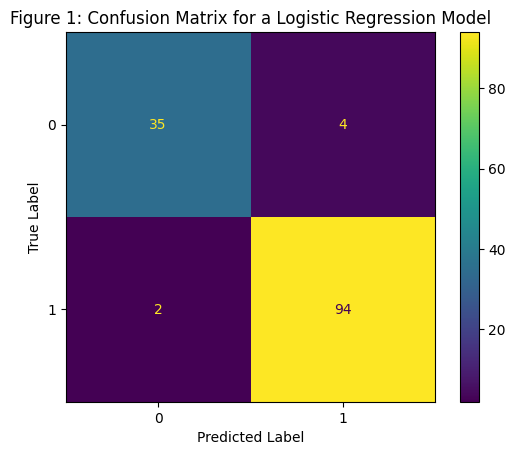

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test, logreg.predict(X_test))

# plot the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = logreg.classes_)
display.plot()
plt.title("Figure 1: Confusion Matrix for a Logistic Regression Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Figure 1: Confusion Matrix for a Logistic Regression Model

The confusion matrix illustrates the performance of the logistic regression model to predict the sector of institution of a university given the predictor variables SAT scores, ACT scores, tuition and fees, ethnic diversities, graduation rate, enrollment size, and admission total on the college admission dataset. The matrix is organized into four quadrants that represent the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). The values in the confusion matrix provide insights into the model's accuracy and error rates, and performance.


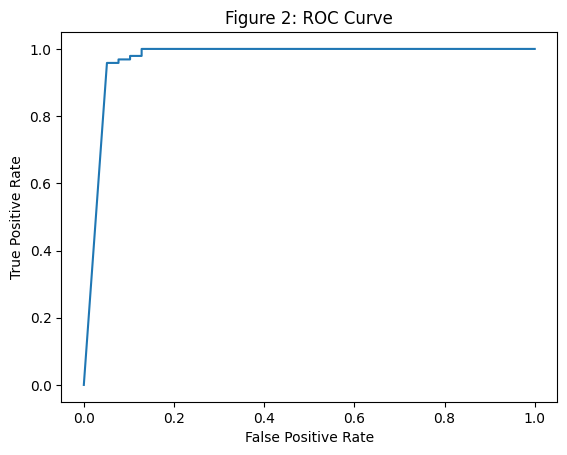

In [ ]:
# ROC Graph
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the roc graph
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.title('Figure 2: ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Figure 2: ROC Curve
The ROC curve illustrates the performance of the logistic regression model

The ROC graph illustrates the performance of the logistic regression model to predict the sector of institution of a university given the predictor variables SAT scores, ACT scores, tuition and fees, ethnic diversities, graduation rate, enrollment size, and admission total on the college admission dataset. The graph plots the true positive rate (TPR) against the false positive rate (FPR) at various thresholds. The graph is a useful visualization that provides insight on how well the model does at distinguishing between the positive and negative cases.  

The performance metrics of the Logistic Regression model are:
*   ROC/AUC Train Score:  1.0
*   ROC/AUC Test Score:  0.9827586206896552
*   Accuracy Train Score:  1.0
*   Accuracy Test Score:  0.9777777777777777
*   Precision Train Score:  1.0
*   Precision Test Score:  1.0
*   Recall Train Score:  1.0
*   Recall Test Score:  0.9655172413793104
*   F1 Train Score:  1.0
*   F1 Test Score:  0.9824561403508771

The ROC/AUC score explains the model's ability to distinguish between positive and negative instances. The accuracy score measures the proportion of correctly classified instances out of all of the instances. Precision measures the proportion of correctly predicted positive instances out of all of the predicted positive instances. Recall measures the proportion of correctly predicted positive instances out of all of the actual positive instances. The F1 score is a balance of precision and recall.

Given the performance metrics of the Logisitic Regression Model, we can infer that this model has really perfect train scores and almost perfect test scores (besides precision). However, the difference between the train and test scores for each model is not difference, therefore the model has high predictive power and accuracy on identifying the sector of institution based on the predictors. From the results of the confusion matrix, there are 35 true negative values, 94 true positive values, 2 false negative values, and 4 false positive values. The confusion matrix and previous performance metric scores further instate that the model has a high accuracy and quality in predictive power. Based on the ROC/AUC test score of 0.98, the ROC curve graph visualizes these results. Based on the graph, the curve hugs closely to the left and top most of the graph, therefore we can infer that the model does a good job in distinguishing between the positive and negative cases.

In real world situations, this model can be useful for market research, analyzing educational policies, and college admission counselings.




# **Clustering**

In this section, we explore 2 Clustering questions.

## **Question 3**
Using admission rates, SAT/ACT scores, average GPAs, and tuition fees, can we identify meaningful clusters of colleges that allow us to compare unique colleges’ admission rates, academic performance, and cost of attendance?

**changes made to question**

Original: "Using admission rates, SAT/ACT scores, average GPAs, and tuition fees,
can we identify meaningful clusters of colleges that allow us to compare unique
colleges’ admission rates, academic performance, and cost of attendance? Which
factors best explain the differences observed?"

Academic performance was initially included to train the model, but there is no variable for in-college performance, only stats prior to admission are present.  Second part of question was removed to retain simplicity of looking at the clusters of the GMM.

In [ ]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from plotnine import ggplot, aes, geom_point, scale_color_manual, theme_minimal
import pandas as pd
from plotnine import *
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from plotnine import ggplot, aes, geom_point, scale_color_manual, theme_minimal
from sklearn.preprocessing import StandardScaler
import plotnine as pn
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/michelleezhangg/final-project/main/college-admissions.csv')
#df = df.reset_index()

df.dropna(subset = ['SAT Critical Reading 25th percentile score', 'SAT Critical Reading 75th percentile score', 'SAT Math 25th percentile score', 'SAT Math 75th percentile score',
        'SAT Writing 25th percentile score', 'SAT Writing 75th percentile score', 'ACT Composite 25th percentile score', 'ACT Composite 75th percentile score', 'Tuition and fees, 2013-14'], inplace = True)


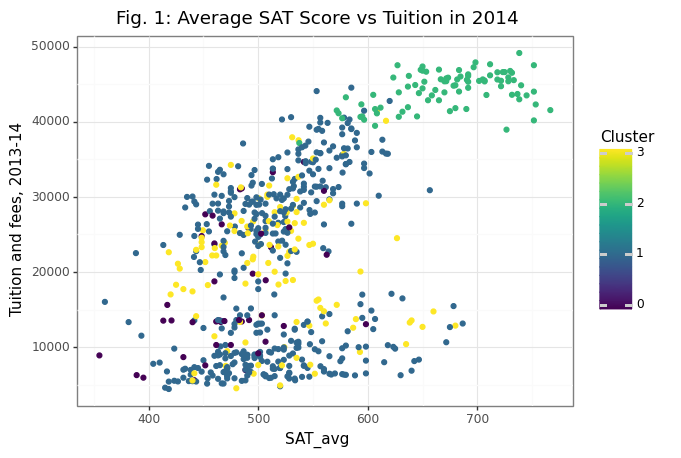


Silhouette Score: 0.016315366556520355


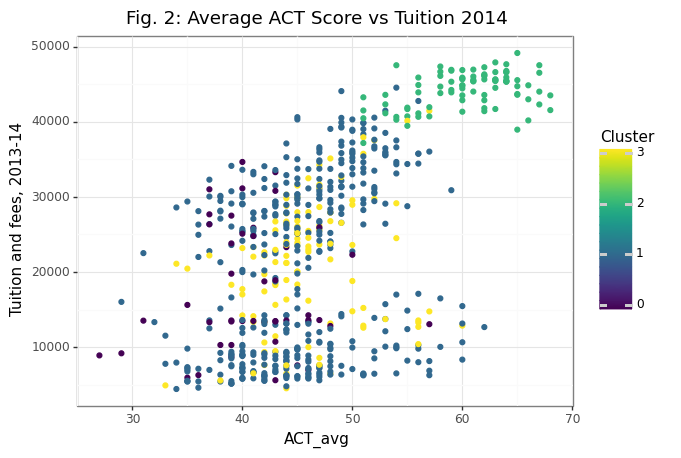


Silhouette Score: 0.016315366556520355


In [ ]:
df['SAT_avg'] = (df['SAT Critical Reading 25th percentile score'] + df['SAT Critical Reading 75th percentile score'] +
                 df['SAT Math 25th percentile score'] + df['SAT Math 75th percentile score'] +
                 df['SAT Writing 25th percentile score'] + df['SAT Writing 75th percentile score']) / 6

df['ACT_avg'] = (df['ACT Composite 25th percentile score'] + df['ACT Composite 75th percentile score'])

X = df[['SAT Critical Reading 25th percentile score', 'SAT Critical Reading 75th percentile score', 'SAT Math 25th percentile score', 'SAT Math 75th percentile score',
        'SAT Writing 25th percentile score', 'SAT Writing 75th percentile score', 'ACT Composite 25th percentile score', 'ACT Composite 75th percentile score', 'Tuition and fees, 2013-14']]

scaler = StandardScaler()
X_scored = scaler.fit_transform(X)

gmm = GaussianMixture(n_components = 4, random_state = 15)
gmm.fit(df[['SAT_avg', 'ACT_avg', 'Tuition and fees, 2013-14']])
pred_y = gmm.fit_predict(X_scored)

df['Cluster'] = pred_y

plot = pn.ggplot(df, pn.aes(x='SAT_avg', y='Tuition and fees, 2013-14', color='Cluster')) + pn.geom_point() + pn.theme_bw() + ggtitle("Fig. 1: Average SAT Score vs Tuition in 2014")
print(plot)
print("Silhouette Score:", silhouette_score(X_scored, pred_y))
plot = pn.ggplot(df, pn.aes(x='ACT_avg', y='Tuition and fees, 2013-14', color='Cluster')) + pn.geom_point() + pn.theme_bw() + ggtitle("Fig. 2: Average ACT Score vs Tuition 2014")
print(plot)
print("Silhouette Score:", silhouette_score(X_scored, pred_y))

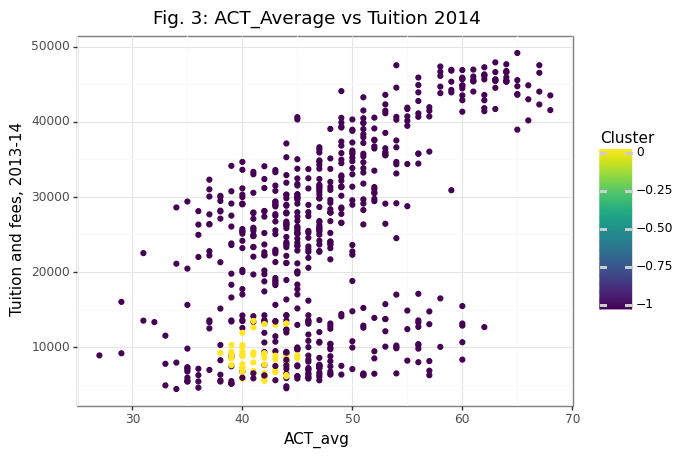


Silhouette Score: 0.016315366556520355


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=.5, min_samples= 15)
clusters = dbscan.fit_predict(X_scored)
df['Cluster'] = clusters
plot = pn.ggplot(df, pn.aes(x='ACT_avg', y='Tuition and fees, 2013-14', color='Cluster')) + pn.geom_point() + pn.theme_bw() + ggtitle("Fig. 3: ACT_Average vs Tuition 2014")
print(plot)
print("Silhouette Score:", silhouette_score(X_scored, pred_y))

# *Analysis of Question 3*
**Figure 1:** this figure presents a Gaussian Mixture Model scatterplot of four different clusters when comparing SAT averages to the cost of tuition in the the 2013-2014 school year.  A GMM was decided to be used when it was assumed that the distribution would have been high in numbers and non-uniform, ruling out a clustering method such as KMeans which assumes a spherical shaped cluster.  The GMM model has a more flexible shape and would be more accurate in this case.  Other clustering methods were used to show the inaccuracy when comparing it to the Gaussian model.  We cannot exactly see distinct clusters when looking at the middle of the plot, but if we looked at the right side of the plot, we see a green cluster towards the top right corner.  This is the one cluster that does not overlap with any of the other clusters that were generated by the GMM.  We can see from this distinct cluster that it sits at high SAT averages and high costs of tuition.  The deduction we can make from this observation is that universities with very high SAT averages tend to be more expensive schools, which could be looked into further to see the acceptance rates of these schools to determine if they are difficult schools to get into.  
We noticed that the middle of the graph had no distinct clusters and had a lot of overlapping points, but there is a good takeaway to be made.  For universities with a median average SAT score, we can observe that the price range of those universities can vary from cheap to somewhat expensive.  Another thing to note here is that none of the points not clustered in the green cluster are above the denser portion of the green cluster.

**Figure 2:** this figure the same context as figure 1, but with a different x-axis.  The ACT scores were used rather than the SAT scores, and as we can see, the clusters follow the same trend.  For consistency, four clusters were made again.  We can see the same overlapping trend of points, but for hte most part there is still a green cluster in the upper-right hand corner of the plot.  We can see that higher ACT averages tend to correlate to a more expensive university.

**Figure 3:** This figure represents a different clustering method that was tried to determine whether or not there was a better clustering method.  A DBSCAN is another clustering method that has parameters such as how many points need to be connected to be considered a cluster and the distance between those points.  In an attempt to get more accurate clusters that would separate the upper right hand corner from the rest of the data, this method was used.  However, as we can see, there were only two "distinct" clusters found by the model, but they do not reveal anything to us.  The bottom portion of the plot shows a cluster it found that was distinct, but it overlaps with everything else.  The distance between clusters and number of points per cluster were played with, but this data set proved to have too many points in one area to have a maximum distance between points.

**Silhouette Scores:** Below each graph is the cluster's silhouette score.  A silhouette score represents how well samples aare clustered and separated from each other ina  clustering algorithm.  It evaluates the quality of the cluster by considering the distance between points and the distance between points in different clusters.  The scores range from -1 to 1 with 1 being the best where all clusters are properly separated from each other.  A score closer to 0 means that the sameples are overlapping where separation between clusters is unclear. A -1 means that the points may have been assigned incorrectly.  According to the first two figures, we know this number is closer to 0 which means that there is not a good separation between the points.  However, as discussed in figures one and two, we know that what we were looking for was the one cluster that appeared distinct even though the rest of the clusters were very much overlapping.  Figure 3 would have been even more proof, but there are only two distinct clusters made in that plot, so the silhouette score is similar.

Meaningful clusters were found when looking at test scores and comparing it to costs of tuition.  These clusters that were found overlapped for the most part, but when looking at more isolated parts of the scatterplot, there was an important cluster that tells us there is a close correlation to students who perform very well on tests and the cost of attendance to the university they go to.  The higher the average test score is for a university, the higher the cost of tuition.  While this doesn't apply to the medium range test scores, it only applies to the 90-99th percentile of test scores.

## **Question 4**
Using cost of tuition, cost of on campus housing and geographic location, can we find meaningful clusters that allow us to compare universities’ ethnic makeup for more/less expensive schools?  

**changes made to question**

Original: "Using cost of tuition, cost of on campus housing, geographic location, and percentage of students who are receiving financial aid, can we find meaningful clusters that allow us to compare universities' ethnic makeup for more/less expensive schools?"

the idea of this question was to show that minorities in colleges in the US are generally going to less expensive schools to show a gap between minorities when it comes to the quality of schools they are going to.  Geographic location would require more research to see what kind of people are located in different areas, and the financial aid variable showed that most people regardless of ethnicity are receiving financial aid.


In [ ]:
# Load the necessary libraries
import pandas as pd
from sklearn.mixture import GaussianMixture
from plotnine import ggplot, aes, geom_point, scale_color_manual, theme_minimal
import pandas as pd
from plotnine import *
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from plotnine import ggplot, aes, geom_point, scale_color_manual, theme_minimal
from sklearn.preprocessing import StandardScaler
import plotnine as pn
from sklearn.metrics import silhouette_score
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/michelleezhangg/final-project/main/college-admissions.csv')
#df = df.reset_index()

df.dropna(subset = ['Tuition and fees, 2013-14', 'Total price for in-state students living on campus 2013-14', 'Total price for out-of-state students living on campus 2013-14', 'Percent of freshmen receiving student loan aid',
                    'Percent of total enrollment that are Asian', 'Percent of total enrollment that are Black or African American', 'Percent of total enrollment that are Hispanic/Latino' ], inplace = True) #drop subset of variables being used for model


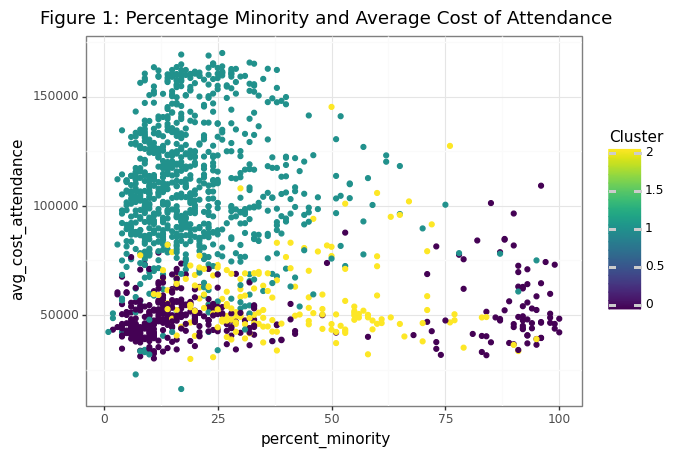


Silhouette Score: 0.24681350194777496


In [ ]:
df['percent_minority'] = (df['Percent of total enrollment that are Asian'] + df['Percent of total enrollment that are Black or African American'] +
                 df['Percent of total enrollment that are Hispanic/Latino']) #calculation to group minorities in schools; represented as a percentage

df['avg_cost_attendance'] = ((df['Tuition and fees, 2013-14'] + df['Total price for in-state students living on campus 2013-14']) + (df['Tuition and fees, 2013-14'] + df['Total price for out-of-state students living on campus 2013-14']) / 2)
#tuition fees plus cost of housing = cost

X = df[['Tuition and fees, 2013-14', 'Total price for in-state students living on campus 2013-14', 'Total price for out-of-state students living on campus 2013-14', 'Percent of freshmen receiving student loan aid',
                    'Percent of total enrollment that are Asian', 'Percent of total enrollment that are Black or African American', 'Percent of total enrollment that are Hispanic/Latino']]

scaler = StandardScaler()
X_scored = scaler.fit_transform(X)

gmm = GaussianMixture(n_components = 3, random_state = 10)
gmm.fit(df[['Tuition and fees, 2013-14', 'Total price for in-state students living on campus 2013-14', 'Total price for out-of-state students living on campus 2013-14', 'Percent of freshmen receiving student loan aid',
                    'Percent of total enrollment that are Asian', 'Percent of total enrollment that are Black or African American', 'Percent of total enrollment that are Hispanic/Latino']])
pred_y = gmm.fit_predict(X_scored)

df['Cluster'] = pred_y

plot = pn.ggplot(df, pn.aes(x='percent_minority', y='avg_cost_attendance', color='Cluster')) + pn.geom_point() + pn.theme_bw() + ggtitle("Figure 1: Percentage Minority and Average Cost of Attendance")
print(plot)
print("Silhouette Score:", silhouette_score(X_scored, pred_y))

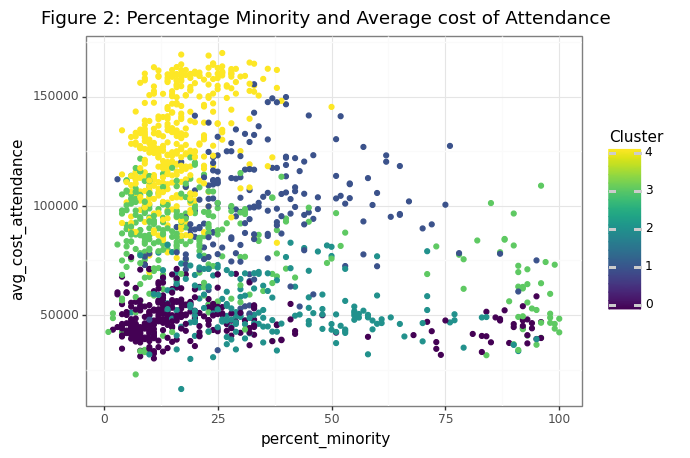


Silhouette Score: 0.12709170421645466


In [ ]:
gmm = GaussianMixture(n_components = 5, random_state = 10)
gmm.fit(df[['Tuition and fees, 2013-14', 'Total price for in-state students living on campus 2013-14', 'Total price for out-of-state students living on campus 2013-14', 'Percent of freshmen receiving student loan aid',
                    'Percent of total enrollment that are Asian', 'Percent of total enrollment that are Black or African American', 'Percent of total enrollment that are Hispanic/Latino']])
pred_y = gmm.fit_predict(X_scored)

df['Cluster'] = pred_y

plot = pn.ggplot(df, pn.aes(x='percent_minority', y='avg_cost_attendance', color='Cluster')) + pn.geom_point() + pn.theme_bw() + ggtitle("Figure 2: Percentage Minority and Average cost of Attendance")
print(plot)
print("Silhouette Score:", silhouette_score(X_scored, pred_y))

#**Analysis of Question 4**
**Figure 1:** This figure represents the comparison of the makeup of minorities in a university and the average cost of attendance.  The aim here was to see if there was a cluster of universities that had a high percentage of minorities along with a lower cost of attendance to highlight the income differences between minorities and those who are not.  A Gaussian Mixture Model, a clustering method, was used to show this difference.  A GMM was used because the shape of the scatterplot was uncertain, and a GMM is more flexible than a KMeans which is another form of clustering.  In the previous question, a similar approach was made.  In this case, the plot shows to be more dense, which would rule a DBSCAN out of the question for this approach.  Figure 1 demonstrates 3 clusters that were found.  While they don't seem to be distinct, we found that the purple plot revealed that universities with a majority of minorities in their school have a lower cost of attendance.  The overall density of this plot sits on the left of 25% of minorities attending a university and those points have the full range of the cost of attendance.  The turquoise points have a wide range, but as we move up on the percentage of minorities, the points become less dense and tend to sit below 100,000.  This allows us to draw the conclusion that schools with more minorities tend to cost less than other universities.  This can be speculated as to say families of minorities are unable to afford more expensive schools.

**Figure 2:** This Figure was a test to see if the cluster plots could be made more accurate, as shown with the use of the silhouette score.  Since the lower end of percentage of minorities were grouped with the same plots as the part of the graph with a higher percentage of minorities, we thought that it would be useful to increase the number of clusters being made.  When increasing the number, the silhouette score became a lot closer to zero, indicating less accurate clustering.  The second figure shows four differently colored points in the 75-100 range of minorities, which means the clustering was not very accurate.  

**Silhouette Scores:** Below each graph is the cluster's silhouette score.  A silhouette score represents how well samples aare clustered and separated from each other ina  clustering algorithm.  It evaluates the quality of the cluster by considering the distance between points and the distance between points in different clusters.  The scores range from -1 to 1 with 1 being the best where all clusters are properly separated from each other.  A score closer to 0 means that the sameples are overlapping where separation between clusters is unclear. A -1 means that the points may have been assigned incorrectly.  As explained in figure 2, it does not seem to accurately represent the relationship between the cost of attendance and the percentage of minorities.  The silhouette score in figure 1 is much higher than the second one, meaning the representation of the first figure is a better way to describe how clusters are made when comparing the cost of attendance and the percentage of minorities in a given university.

When considering the cost of tuition and the percentage of minorities that attend a university, the plots show us meaningful clusters of schools with high percentages of minorities and a lower cost of tuition compared to other universities.  These plots show that for lower makeups of minorities in a school, the price range can vary from the least to most expensive.  However, once we get over 50 percent makeup of minorities, we see the number of points decrease and the overall cost of tuition decrease as well.

# **Dimensionality Reduction**

In the section, we explore 2 Dimensionality Reduction questions.

Dimensionality Reduction is the process of reducing the number of features/variables in a dataset while preserving the essential information. These algorithms are extremely useful especially dealing with data with high dimensionality or in other words, data that has a lot of variables/predictors.

In the following 2 problems, we used Principal Components Analysis (PCA). PCA is a type of dimensionality reduction algorithm that takes in a set of variables and creates new, more efficient set of variables.

In [ ]:
# Importing packages
from plotnine import *
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # simple TT split cv
import numpy as np
import seaborn as sb

## **Question 5**
What is the minimum amount of principal components that explain more than 90% variance in the model? Using PCA, how do we determine how many principal components we should use?

In [ ]:
# data cleaning: dropping non-continuous variables
non_contin = ['Name', 'State abbreviation', 'FIPS state code', 'Geographic region',
                      'Sector of institution', 'Level of institution', 'Control of institution',
                      'Historically Black College or University', 'Tribal college',
                      'Degree of urbanization (Urban-centric locale)', 'Carnegie Classification 2010: Basic']
df5 = df.copy() # making copy of original df
df5.drop(columns = non_contin, inplace = True)

# data cleaning: dropping variables with too many na values
print(df5.isna().sum().sort_values())
na = ['Endowment assets (year end) per FTE enrollment (GASB)', # 1018 NA values
      'SAT Writing 75th percentile score', # 820 values
      'SAT Writing 25th percentile score'] # 820 values
df5.drop(columns = na, inplace = True)

# data cleaning: dropping na values
df5.dropna(inplace = True)

# initialize features to z-score
features = df5.columns
num_features = len(features)

# z-scoring
z = StandardScaler()
df5[features] = z.fit_transform(df5[features])

Percent of total enrollment that are Nonresident Alien                             0
Percent of undergraduate enrollment that are Black or African American             0
Percent of undergraduate enrollment that are Asian                                 0
Percent of undergraduate enrollment that are American Indian or Alaska Native      0
Percent of total enrollment that are women                                         0
                                                                                ... 
Percent of first-time undergraduates - out-of-state                              521
Percent of first-time undergraduates - in-state                                  521
SAT Writing 75th percentile score                                                708
SAT Writing 25th percentile score                                                708
Endowment assets (year end) per FTE enrollment (GASB)                            921
Length: 100, dtype: int64


In [ ]:
# PCA model
pca = PCA()
pca.fit(df5[features])

PCA()

In [ ]:
# making pcaDF
pcaDF = pd.DataFrame({"expl_var" : pca.explained_variance_ratio_,
                      "pc": range(1,num_features + 1), # changed to match the length
                      "cum_var" : pca.explained_variance_ratio_.cumsum()})

pcaDF.head()

,expl_var,pc,cum_var
0,0.344776,1,0.344776
1,0.118440,2,0.463216
2,0.076132,3,0.539349
3,0.053956,4,0.593304
4,0.036625,5,0.629929


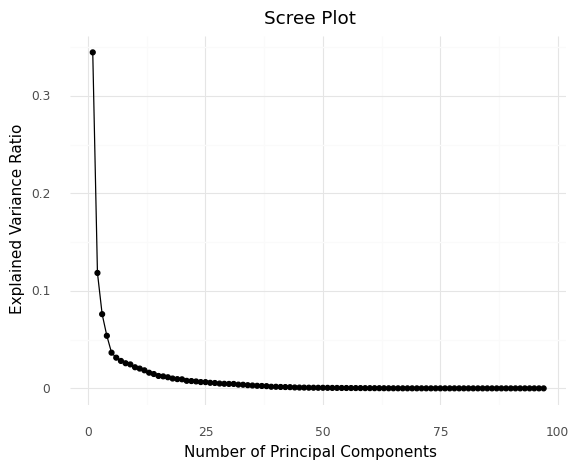

<ggplot: (8767836178414)>

In [ ]:
# Scree plot
(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() +
 geom_point() +
 theme_minimal() +
 labs(title = "Scree Plot",
      x = "Number of Principal Components",
      y = "Explained Variance Ratio"))

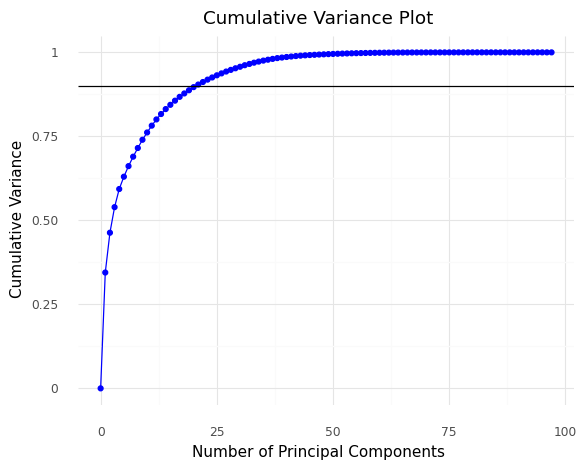

<ggplot: (8767836222236)>

In [ ]:
# Cumulative Variance Plot

# (0,0,0) added to dataframe for better context in the cumulative variance plot below
pcaDF = pcaDF.append({"expl_var": 0, "pc" : 0, "cum_var": 0}, ignore_index = True)


(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "blue") +
 geom_point(color = "blue") + geom_hline(yintercept = 0.90) +
 theme_minimal() +
 labs(title = "Cumulative Variance Plot",
      x = "Number of Principal Components",
      y = "Cumulative Variance"))

## **Question 5 Analysis and Answer**

A **Scree Plot** shows how much variance each variable explains. The x-axis shows the number of each component and the y-axis shows the proportion of variance that variable explains. This number is between 0 and 1.

A **Cumulative Variance Plot** is essentially a scree plot that tells you the cumulative amount of information that each component from 1 up to itself explains.

We can use both of these plots to choose the number of principal components to keep. Looking at the cumulative variance plot, with the 90% cumulative variance horizontal line, I count **10 principal components**. I excluded the (0,0) point below as it was just added to the dataframe for more context and is not a principal component. Additionally, the scree plot shows that the variable that explains the highest variance in the data explains roughly 35% of the variance, the second highest explains roughly 12%, the third highest explains roughly 7.5%, then the percentage get less and less meaning that those variable are not as important to keep as a principal component.

In conclusion, after cleaning the data, z-scoring the variables, and plotting the scree plot and cumulative variance plot, I conclude that the minimum amount of principal components that explain 90% of the original variance is **10 principal components**.

## **Question 6**
How does incorporating PCA affect a model's performance and which original features have the strongest association with predicting enrollment total in the dataset using PCA?

I changed this question from the original: Which features have the strongest association with predicting enrollment total in the dataset, and can we build a predictive model that uses only the most important features?

The reason I changed it is because comparing multiple models with some using PCA and some not allows us to better understand the algorithm and its uses. Additionally, just finding the most important features would not have been an effective dimensionality reduction question and analyzing the performances of PCA would be more informative.

In this section, I made 3 linear regression models:

1. With only the first **10 principal components**.
2. With only the first **4 principal components**.
3. With **all** the variables.

I wanted to compare their accuracies and see if excluding some variables due to PCA will affect the overall accuracy of predicting enrollment total. I chose 10 principal components for the first linear regression model because in Question 5 that was the minimal amount of principal components to retain 90% of the original variance. Then, I chose 4 principal components for the second linear regression model to see if less information/principal components were used, how would it affect the accuracy and the model in general. Then, I included all of the variables for the last linear regression model to compare with the other 2 models.

In [ ]:
# grabbing the first 10 principal components (from Question 5)
pcomps10 = pca.transform(df5[features])
pcomps10 = pd.DataFrame(pcomps10[:, 0:10])

# grabbing the first 10 principal components (from Question 5)
pcomps4 = pca.transform(df5[features])
pcomps4 = pd.DataFrame(pcomps4[:, 0:4])

In [ ]:
from sklearn.linear_model import LinearRegression

# building a linear regression model (first 10 principal components)
lr1 = LinearRegression()
lr1.fit(pcomps10, df5['Enrolled total'])
print("10 PCs:", lr1.score(pcomps10, df5['Enrolled total']))

# building a linear regression model (first 4 principal components for comparison)
lr2 = LinearRegression()
lr2.fit(pcomps4, df5['Enrolled total'])
print("4 PCs:", lr2.score(pcomps4, df5['Enrolled total']))

# building linear regression model (all predictors)
# removing 'Enrolled total' before fitting the model
lr3 = LinearRegression()
features = list(features)
features.remove('Enrolled total')
lr3.fit(df5[features], df5['Enrolled total'])
print("All data:", lr3.score(df5[features], df5['Enrolled total']))

10 PCs: 0.9600100820301571
4 PCs: 0.9018532237859717
All data: 0.9988139713382893


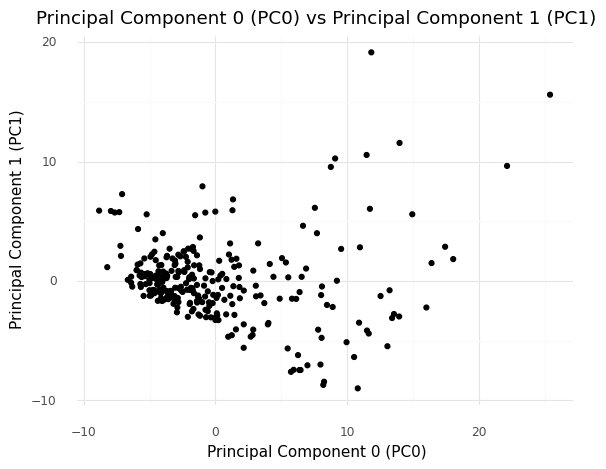

<ggplot: (8767836123968)>

In [ ]:
# plotting principal components (10 PCs)
pcomps10.columns = ['PC' + str(i) for i in range(0, 10)] # renaming columns to make it easier
(ggplot(pcomps10, aes(x = 'PC0', y = 'PC1')) +
 theme_minimal() +
 geom_point() +
 labs(title = "Principal Component 0 (PC0) vs Principal Component 1 (PC1)",
      x = "Principal Component 0 (PC0)",
      y = "Principal Component 1 (PC1)"))

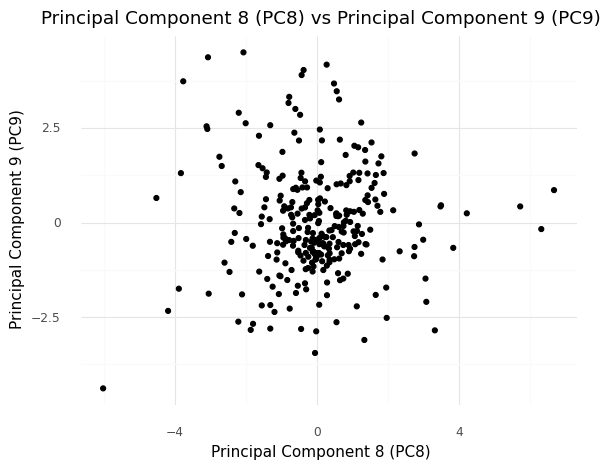

<ggplot: (8767907729916)>

In [ ]:
# plotting more principal components (10 PCs)
(ggplot(pcomps10, aes(x = 'PC8', y = 'PC9')) +
 theme_minimal() +
 geom_point() +
 labs(title = "Principal Component 8 (PC8) vs Principal Component 9 (PC9)",
      x = "Principal Component 8 (PC8)",
      y = "Principal Component 9 (PC9)"))

## **Question 6 Plots**

The plots above are just for visualizing the principal components plotted against each other. The first plot is the first principal component (PC0) plotted against the second principal component (PC1). The second plot is the last principal component (PC9) and the second-to-last principal component (PC8). Each principal component represents a different axis/direction in the transformed space. This can be useful for clustering algorithms and observe potential clusters and patterns. If the points are closer to each other, the more similar the principal components are and and the farther apart the points are, the more dissimilar the principal components are. This can be seen in the first plot where the points are much closer and in the last plot, the points are more spread out showing that the first plot is more similar than the second one.

In [ ]:
# grabbing PC loadings
features.append('Enrolled total')
loadings = pd.DataFrame({"loadings" : pca.components_.flatten(),
                         "comp" : np.repeat(range(1, num_features + 1), num_features, axis = 0),
                         "variable" : np.tile(features, num_features)})
loadings.head(20)

,loadings,comp,variable
0,0.148731,1,Applicants total
1,0.101598,1,Admissions total
2,0.133945,1,Percent of freshmen submitting SAT scores
3,0.051183,1,Percent of freshmen submitting ACT scores
4,-0.046801,1,SAT Critical Reading 25th percentile score
5,0.148659,1,SAT Critical Reading 75th percentile score
6,0.141817,1,SAT Math 25th percentile score
7,0.150049,1,SAT Math 75th percentile score
8,0.148693,1,ACT Composite 25th percentile score
9,0.148514,1,ACT Composite 75th percentile score


In [ ]:
# grabbing PC1 loadings
pc1_loadings = loadings.loc[loadings.comp == 1]
pc1_loadings.sort_values(by = "loadings", ascending = False).head(10)

,loadings,comp,variable
7,0.150049,1,SAT Math 75th percentile score
0,0.148731,1,Applicants total
8,0.148693,1,ACT Composite 25th percentile score
5,0.148659,1,SAT Critical Reading 75th percentile score
9,0.148514,1,ACT Composite 75th percentile score
31,0.143301,1,Total enrollment
33,0.142929,1,Part-time enrollment
12,0.142815,1,"Estimated enrollment, part time"
6,0.141817,1,SAT Math 25th percentile score
10,0.141604,1,"Estimated enrollment, total"


In [ ]:
# grabbing PC2 loadings
pc2_loadings = loadings.loc[loadings.comp == 2]
pc2_loadings.sort_values(by = "loadings", ascending = False).head(10)

,loadings,comp,variable
110,0.192878,2,"Estimated undergraduate enrollment, total"
131,0.190654,2,Undergraduate enrollment
113,0.185484,2,"Estimated freshman undergraduate enrollment, t..."
135,0.183720,2,Percent of total enrollment that are American ...
169,0.180421,2,Percent of first-time undergraduates - in-state
111,0.177886,2,"Estimated undergraduate enrollment, full time"
132,0.177236,2,Graduate enrollment
108,0.166483,2,"Estimated enrollment, full time"
129,0.166059,2,Full-time enrollment
112,0.163867,2,"Estimated undergraduate enrollment, part time"


In [ ]:
# grabbing PC3 loadings
pc3_loadings = loadings.loc[loadings.comp == 3]
pc3_loadings.sort_values(by = "loadings", ascending = False).head(10)

,loadings,comp,variable
288,0.307990,3,avg_cost_attendance
247,0.200229,3,Percent of undergraduate enrollment that are N...
236,0.199396,3,Percent of total enrollment that are Native Ha...
258,0.186484,3,Percent of graduate enrollment that are Native...
246,0.185894,3,Percent of undergraduate enrollment that are H...
235,0.185693,3,Percent of total enrollment that are Hispanic/...
257,0.180351,3,Percent of graduate enrollment that are Hispan...
242,0.150000,3,Percent of total enrollment that are women
234,0.144416,3,Percent of total enrollment that are Black or ...
253,0.142474,3,Percent of undergraduate enrollment that are w...


In [ ]:
# grabbing PC4 loadings
pc4_loadings = loadings.loc[loadings.comp == 4]
pc4_loadings.sort_values(by = "loadings", ascending = False).head(10)

,loadings,comp,variable
364,0.222500,4,Number of first-time undergraduates - out-of-s...
355,0.215520,4,Percent of graduate enrollment that are Native...
333,0.210830,4,Percent of total enrollment that are Native Ha...
344,0.210698,4,Percent of undergraduate enrollment that are N...
380,0.200922,4,Percent of freshmen receiving student loan aid
315,0.167483,4,Admissions yield - total
345,0.166112,4,Percent of undergraduate enrollment that are W...
334,0.165808,4,Percent of total enrollment that are White
340,0.158381,4,Percent of undergraduate enrollment that are A...
351,0.150683,4,Percent of graduate enrollment that are Americ...


In [ ]:
# grabbing PC5 loadings
pc5_loadings = loadings.loc[loadings.comp == 5]
pc5_loadings.sort_values(by = "loadings", ascending = False).head(10)

,loadings,comp,variable
434,0.273966,5,Percent of total enrollment that are Nonreside...
445,0.267358,5,Percent of undergraduate enrollment that are N...
448,0.206532,5,Percent of graduate enrollment that are Americ...
437,0.206214,5,Percent of undergraduate enrollment that are A...
456,0.205868,5,Percent of graduate enrollment that are Nonres...
391,0.179035,5,Percent of freshmen submitting ACT scores
459,0.161948,5,Number of first-time undergraduates - in-state
418,0.139018,5,Total price for out-of-state students living o...
414,0.136097,5,"Tuition and fees, 2011-12"
483,0.135816,5,Cluster


In [ ]:
loadings_by_variable = {}
for feat in features:
  loadings_by_variable[feat] = 0

for index, row in loadings.iterrows():
  loadings_by_variable[row['variable']] += row['loadings'] * row['comp']

top10_variables = sorted(loadings_by_variable.items(), key = lambda x: x[1])[:10]

index = 1
for variable, loading in top10_variables:
  print(index, variable)
  index += 1

1 Estimated undergraduate enrollment, total
2 Estimated undergraduate enrollment, part time
3 Tuition and fees, 2012-13
4 Estimated graduate enrollment, part time
5 Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander
6 Percent of freshmen receiving other federal grant aid
7 Cluster
8 Graduation rate - Bachelor degree within 6 years, total
9 Percent of first-time undergraduates - out-of-state
10 SAT Critical Reading 25th percentile score


## **Question 6 Analysis**

The accuracy scores for the 3 linear regression models are stated below:

1. 10 PCs: 0.9590888014491358 (**95.91%**)
2. 4 PCs: 0.9037265117214013 (**90.37%**)
3. All data: 0.9988113774127306 (**99.88%**)

The original accuracy using all of the data is **99.88%** and with the first 10 principal component is **95.91%** which is only roughly a **3.97%** accuracy percentage difference. That means with just including the first 10 principal component still leaves a high accuracy score which shows the power of dimensionality reduction. If only the most important information was kept in to train a model to predict enrollment total, a large amount of accuracy and original variance will still be retained. Then, comparing having only 4 principal components leaves roughly a **9.51%** percentage difference compared to the accuracy of using all of the data. **90.37%** accuracy is still relatively good especially considering the fact that a lot of the original information was taken out with the help of PCA.

In terms of which of the original variables have the strongest associations with the variable enrollment total, we can look at the loadings of a few of the first PCs. The **loadings** of a principal component is the coefficient of the linear combination of the original variables from which that principal component is constructed. Therefore, the higher the number (percentage), the more of a contribution it made to that principal component. The logic I coded in the last cell calculates how much each original variable contributed to each principal component all summed up considering that the first principal components are more important/relevant than the ones below it.

The results are printed at the top with the variable **Estimated undergraduate enrollment, part time** having the strongest association with Enrollment total.

The top 10 are as follows:

1. Estimated undergraduate enrollment, part time
2. Percent of first-time undergraduates - out-of-state
3. Percent of freshmen receiving other federal grant aid
4. Total price for in-state students living on campus 2013-14
5. Number of students receiving an Associate's degree
6. Estimated graduate enrollment, part time
7. Graduation rate - Bachelor degree within 6 years, total
8. Percent of freshmen submitting ACT scores
9. Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander
10. Estimated enrollment, total

Overall, dimensionality reduction and specifically PCA is an incredibly useful tool that strives to maximize the accuracy of a model by including minimal information needed to do so. In this question, we explored the accuracies of including principal components vs including all of the data. Moreover, looking at the loadings and calculating which of the original variables contributed the most to forming the principal components and in turn, signifying strong association with the predicted variable, enrollment total.

In [ ]:
# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null

# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# installing pypandoc
!pip install pypandoc

# connecting your google drive
from google.colab import drive
drive.mount('/content/drive')

# copying your file over. Change "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!cp "drive/My Drive/Colab Notebooks/FinalProject.ipynb" ./

# Again, replace "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!jupyter nbconvert --to PDF "FinalProject.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (2.5-3build2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 javascript-common libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1
  libgs9 libgs9-common libharfbuzz-icu0 libidn11 libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpdfbox-java libptexenc1 libruby2.7 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-minitest ruby-net-telnet
  ruby-power-assert ruby-test-unit ruby-xmlrpc ruby2.7 rubygems-integration
  t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-g